<table border="0" style="width:100%">
 <tr>
    <td><div style="font-family:'Arial'">
            <div style="font-size:30px">
                <div style="text-align: left"> 
                    <b> Machine Learning II : Group Assignment</b>
                    <br>
                    <div style="font-size:20px">
                    Binary Prediction of Smoker Status using Bio-Signals
                    </div>
                    <br>
                    <div style="font-size:18px">
                    <b> Group 5 </b>
                    <br>
                    <div style="font-size: 15px">
                    Jorge Gonzales Ehlinger | Valeria Abraham | Anthony de Roeck | Josh Salvador | Yiyu Chen | Bernardo Arias
                    </div>
                    </div>
                </div>
            </div>
        </div>
    </td>
    <td style="background-color: white">
        <img src="https://static-frm.ie.edu/university/wp-content/uploads/sites/6/2022/06/IE-University-logo.png" width=150>
     </td>
 </tr>
</table>

- 📚[Introduction](#1) 
- 📊[Data Gathering](#2) 
   - 📋 [Importing the necessary libraries](#2.1)
   - 📦 [Extracting the data](#2.2)
- 🛠️[Data Preparation](#3) 
   - 📝 [Data exploration](#3.1)
   - 📝 [Data cleaning](#3.2)
   - 📊 [Data transformation](#3.3)
- 🧠[Model Training](#4) 
   - 🧪 [Splitting data into training and testing sets](#4.1)
   - ⚙️ [Training the model](#4.2)
   - 🔍 [RandomizedSearchCV](#4.3)
- 📈[Model Evaluation](#5) 
   - 📊 [Performance metrics calculation](#5.1)
   - 📉 [Visualizing model performance](#5.2)
- 🏆[Model Selection](#6) 
   - 🔄 [Comparing different models](#6.1)
   - 📋 [Choosing the best model](#6.2)



<a id="1"></a>
## <div style="font-size=20px"><b>📚 Introduction</b></div>


This notebook focuses on constructing a machine learning model aimed at discerning whether an individual is a smoker or non-smoker using bio-signals data obtained from Kaggle. The model's training will utilize a dataset comprising diverse bio-signals including heart rate, eyesight, hearing, among others, coupled with associated smoker labels. The principal aim is to develop a dependable predictive model boasting high accuracy, sensitivity, and specificity in effectively categorizing individuals based on smoking habits. This binary classification task holds significance in uncovering an individual's smoking status and assessing potential health risks associated with it.

<a id="2"></a>
## <div style="font-size=20px"><b>📊 Data Gathering</b></div>


<div style="font-size=16px">
📋 Importing the necessary libraries:
</div>


Below are the libraries we have used to explore, model, train, evaluate and visualize our dataset: <br>

<b>Data Preprocessing and Feature Scaling:</b><br>
<ul>
  <li><font color='#FF5733'>preprocessing module</font> from the sklearn library: Contains functions for data preprocessing tasks like encoding categorical variables, scaling features, etc.</li>
 
</ul>

<b>Machine Learning Models:</b><br>
<ul>
  <li><font color='#FF5733'>LogisticRegression</font> from the sklearn.linear_model module: Implements logistic regression.</li>
  <li><font color='#FF5733'>RandomForestClassifier</font> from the sklearn.ensemble module: Implements a random forest classifier.</li>
  <li><font color='#FF5733'>xgboost library</font>: An optimized gradient boosting library.</li>
</ul>

<b>Model Evaluation and Validation:</b><br>
<ul>
  <li><font color='#FF5733'>model_selection</font> from the sklearn library: Provides functions for model selection and evaluation.</li>
  <li><font color='#FF5733'>train_test_split</font> from the sklearn.model_selection module: Splits datasets into training and testing sets.</li>
  <li><font color='#FF5733'>RandomizedSearchCV</font> from the sklearn.model_selection module: Performs hyperparameter tuning using randomized search.</li>
  <li><font color='#FF5733'>cross_val_score</font> from the sklearn.model_selection module: Evaluates a model using cross-validation.</li>
  <li><font color='#FF5733'>metrics</font> from the sklearn library: Contains various metrics for evaluating models.</li>
  <li><font color='#FF5733'>roc_auc_score</font> from the sklearn.metrics module: Computes the area under the receiver operating characteristic curve (ROC AUC).</li>
  <li><font color='#FF5733'>confusion_matrix</font> from the sklearn.metrics module: Computes a confusion matrix.</li>
</ul>

<b>Data Visualization:</b><br>
<ul>
  <li><font color='#FF5733'>stats</font> from the scipy library: Provides statistical functions and tests.</li>
  <li><font color='#FF5733'>matplotlib.pyplot module</font> Used for creating visualizations.</li>
  <li><font color='#FF5733'>seaborn</font> Enhances the visualizations in Python.</li>
</ul>



In [1]:

from sklearn import preprocessing


from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn import model_selection
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, auc,f1_score


import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

<a id="2.2"></a>
<div style="font-size: 16px;">
📦 Extracting the data:
</div>


In [3]:
train= pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
    


<a id="3"></a>
## <div style="font-size=20px"><b>🛠️ Data Preparation</b></div>


Check for missing values and datatypes:


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [5]:
train.duplicated().sum() #no duplicates 

0

The dataset appears to be clean, with no missing values and all data types being numeric. Additionally, there are no categorical values that require translation for the model, simplifying the preprocessing steps. This clean dataset facilitates a smoother analysis process, allowing us to focus on building and evaluating predictive models without the need for extensive data cleaning and preprocessing

In [6]:
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


This provides a comprehensive overview of the dataset, offering insights into the metrics of each feature. This summary statistics. By examining these descriptive statistics, we gain a deeper understanding of the central tendency, variability, and distribution of the data, laying a solid foundation for further analysis and model development.


<div style="font-size: 16px;">
📝 Data exploration:
</div>

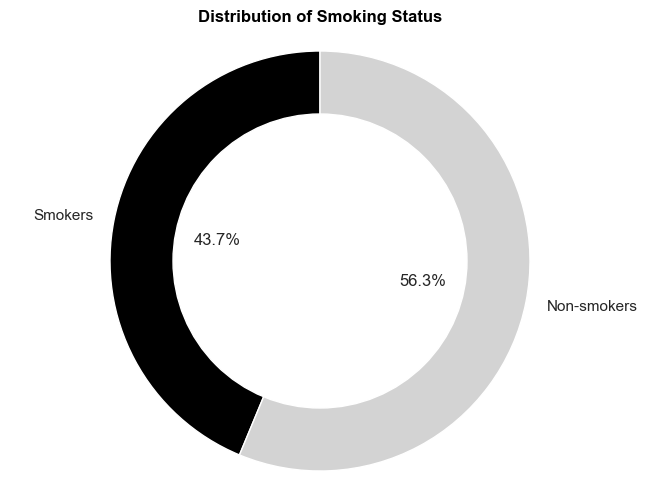

In [7]:

sns.set_theme(style="whitegrid")

plt.rcParams['font.family'] = 'Sans serif'
plt.rcParams['font.serif'] = 'Work Sans'
plt.rcParams['font.size'] = 12


smokers_count = (train['smoking'] == 1).sum()
non_smokers_count = (train['smoking'] == 0).sum()

labels = ['Smokers', 'Non-smokers']
sizes = [smokers_count, non_smokers_count]
colors = ['black', 'lightgrey']  


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: '{:.1f}%'.format(p), startangle=90, pctdistance=0.5)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  #
plt.axis('equal')  
plt.title('Distribution of Smoking Status', fontweight='bold', color='black')  # Change title color to black
plt.show()



The pie chart illustrates the distribution of smoking status in our dataset, revealing an even split between smokers and non-smokers. This balance facilitates a straightforward comparison of features between the two groups, enabling us to identify any trends or preferences related to smoking behavior. It's worth noting that if the distribution were imbalanced, techniques such as undersampling or oversampling might be necessary to address any class imbalance issues. Nevertheless, the current balance simplifies our analysis, providing clarity on how features correlate with smoking behavior.

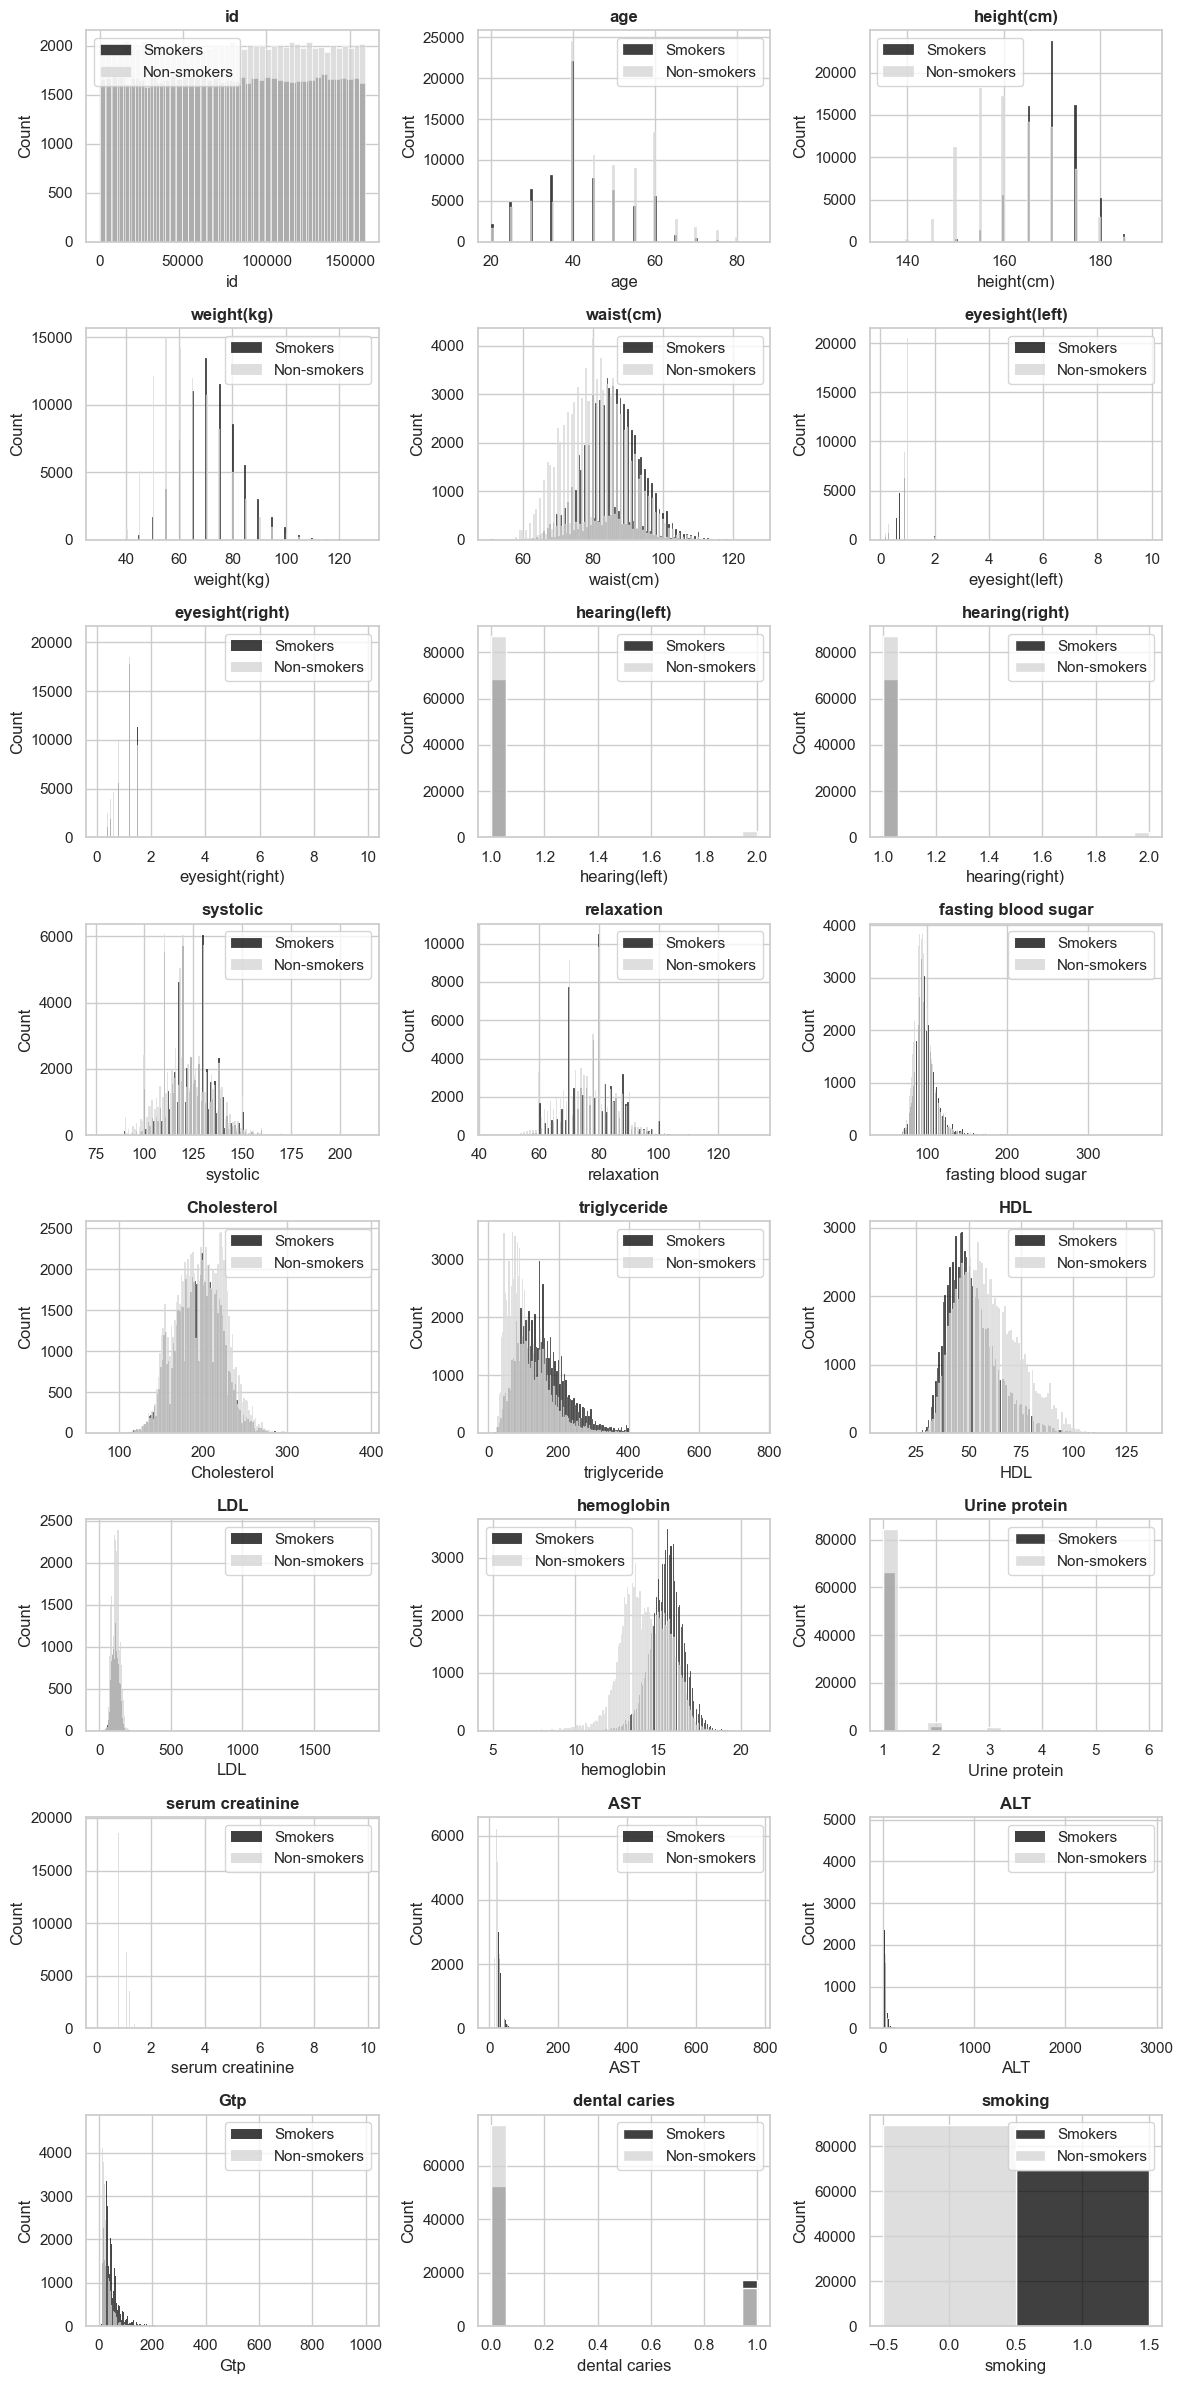

In [8]:
sns.set_theme(style="whitegrid")
sns.set_palette("Blues")

plt.rcParams['font.family'] = 'Sans serif'
plt.rcParams['font.serif'] = 'Work Sans'
plt.rcParams['font.size'] = 12

n_cols = 3
n_rows = int(np.ceil(len(train.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()


for i, col in enumerate(train.columns):
    sns.histplot(train[train['smoking'] == 1][col], ax=axes[i], color='black', label='Smokers')
    sns.histplot(train[train['smoking'] == 0][col], ax=axes[i], color='lightgrey', label='Non-smokers')
    axes[i].set_title(col, fontweight='bold')
    axes[i].legend()

plt.tight_layout()
plt.show()


After a first glance we can observe how some of the features can help us identify the smokers for example, trygliceride, hemoglobin, waist or weight tend to have more black color on the right, meaning that smokers tend to have a higher values of this features. 

on dental caries even though both classes appear to have it, on proportion smokers tend to have dental caries. 



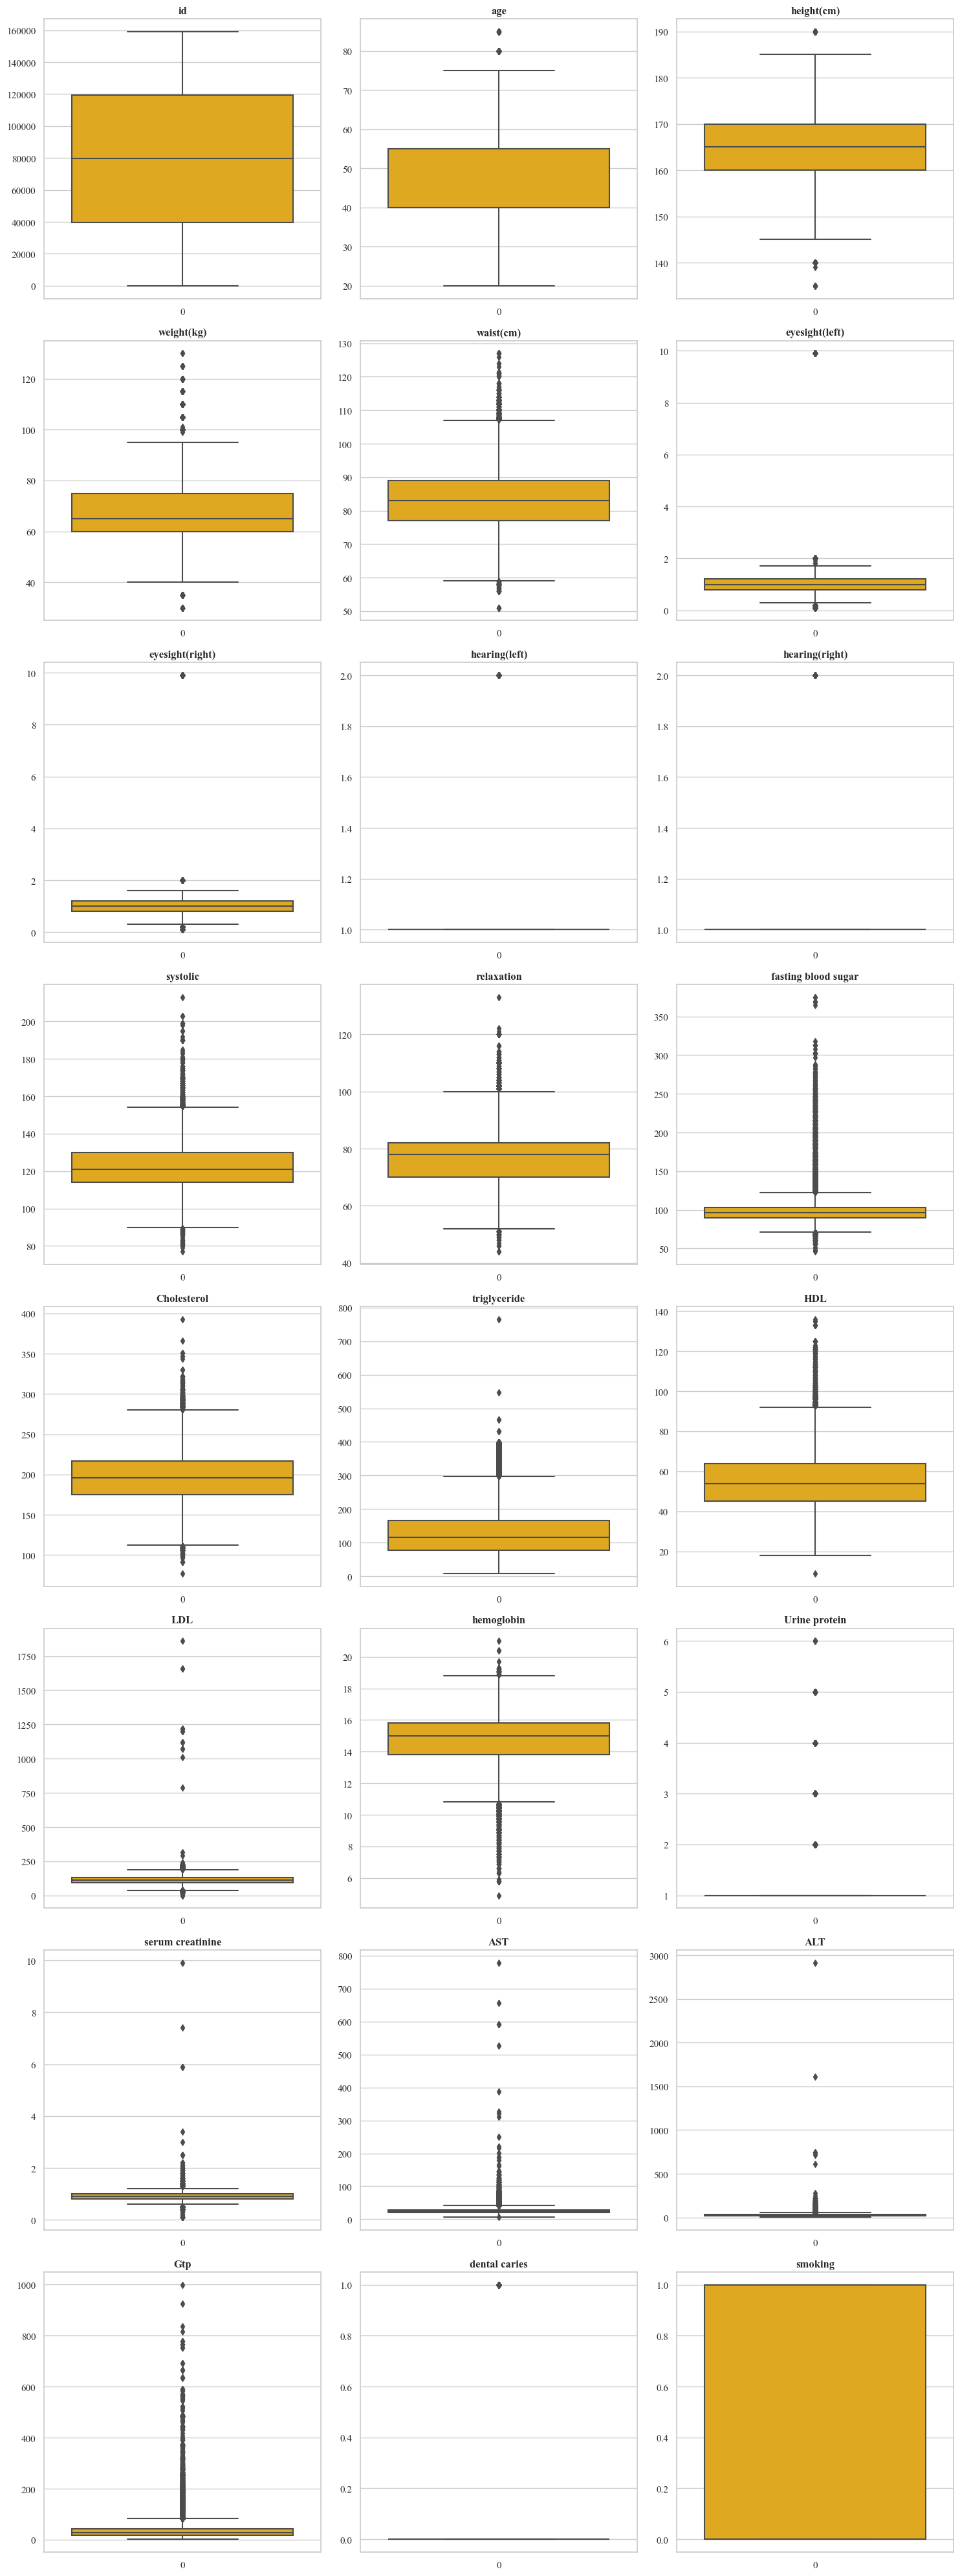

In [10]:

sns.set_theme(style="whitegrid")
sns.set_palette("Blues")


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

n_cols = 3
n_rows = int(np.ceil(len(train.columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))


axes = axes.flatten()

for i, col in enumerate(train.columns):
    sns.boxplot(data=train[col], ax=axes[i], color='#FEB500')
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_xlabel(None)  
    axes[i].set_ylabel(None)  



plt.tight_layout()
plt.show()


Looking at the box plots for each variable, we observe outliers present across almost every column. However, it's essential to interpret these outliers within the context of our health dataset. With diverse individuals: various sexes and backgrounds, direct comparisons can be challenging. For instance, a larger waist size doesn't necessarily is poor health; factors like age and body type must be considered. While identifying outliers is crucial, we mustn't apply overly strict criteria, as our goal is to develop a model capable of generalizing across diverse populations.

However, certain columns get particular attention, as they have isolated outliers that appear to be extremely uncommon

* ALT
* LDL
* TRIGLYCERIDE
* AST
* GTP


In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

columns_to_check = ['ALT', 'LDL', 'triglyceride', 'AST', 'Gtp']

summary_stats = train[columns_to_check].describe().transpose()

# Define the color
color = '#FEB500'  # Change color to #FEB500

for i, col in enumerate(columns_to_check, start=1):
    fig = make_subplots(rows=1, cols=1,
                        subplot_titles=[col],
                        vertical_spacing=0.1,  # Reduce vertical spacing
                        horizontal_spacing=0.02)  # Reduce horizontal spacing

    fig.add_trace(go.Bar(
        x=['min', 'max', 'median', 'mean'],
        y=[summary_stats.loc[col, 'min'], summary_stats.loc[col, 'max'],
           summary_stats.loc[col, '50%'], summary_stats.loc[col, 'mean']],
        name=col,
        marker=dict(color=color),
        showlegend=False
    ))

    # Update layout
    fig.update_layout(
        title=f'Summary Statistics of {col}',
        xaxis=dict(title='Statistic'),
        yaxis=dict(title='Value'),
        height=300,  # Set fixed height
        width=500  # Set fixed width
    )

    fig.show()


We can see that the median and the mean are close, meaning that it is common to be around those values, but the max is not only higher but way out of bound:


In [12]:


columns_to_check = ['ALT', 'LDL', 'triglyceride', 'AST', 'Gtp']


summary_stats = train[columns_to_check].describe().transpose()


summary_stats['times_bigger'] = (summary_stats['max']  / summary_stats['mean'])


fig = px.scatter(summary_stats, x=summary_stats.index, y='times_bigger',
                 color_continuous_scale='Blues', size='times_bigger', hover_name=summary_stats.index)


fig.update_layout(
    title='Max vs mean',
    xaxis=dict(title='Variable'),
    yaxis=dict(title='How bigger is the max vs mean'),
    showlegend=False
)

fig.update_traces(marker=dict(colorscale='Blues_r'))

fig.show()


Take a look: the smallest difference (triglyceride) is 600% higher than the mean. As we mention, we're not just sticking to values close to the average because that wouldn't help our model cover all scenarios. These super rare values, like ALT, which is a massive 109 times higher than the mean, could really throw off our predictions. So, our plan is to deal with outliers by keeping a wide range to cover a lot of possibilities. However, we'll also toss out those extremely rare data points because they're likely either errors or values so extreme that they'll only mess with our model.

In [13]:


correlation_matrix = train.corr()

smoking_correlation = correlation_matrix['smoking']

# Sort
smoking_correlation_sorted = smoking_correlation.abs().sort_values(ascending=False)

# Reorder
correlation_matrix_ordered = correlation_matrix.loc[['smoking'], smoking_correlation_sorted.index]

# Define the color
colorscale = [[0, '#ffffff'], [1, '#FF8C00']]  # Darker shade of orange

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix_ordered.values,
    x=correlation_matrix_ordered.columns,
    y=correlation_matrix_ordered.index,
    colorscale=colorscale,
))

fig.update_layout(
    title='Correlation with Smoking',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Smoking'),
)

fig.show()



In this graph, we're looking at the correlation between smoking and other variables. The higher the number, the stronger the relationship between the variable and smoking, which means the model will consider these variables more when predicting smoking behavior. On the flip side, variables like hearing, urine, and ID have correlation values close to zero, indicating little to no connection with smoking. Understanding these correlations is vital because variables with weak correlations might not contribute much to the model's predictive power and could potentially introduce noise.

In [14]:


features_df = train.drop(['smoking', 'id'], axis=1)

correlation_matrix = features_df.corr()

# Define a better colorscale
colorscale = 'redor' 

# Create a list to store the annotation text
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(dict(text=str(round(value, 2)),
                                x=correlation_matrix.columns[j],
                                y=correlation_matrix.index[i],
                                xref='x1',
                                yref='y1',
                                font=dict(color='white' if value > 0.5 else 'black'),  # Adjust font color based on correlation strength
                                showarrow=False))

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale=colorscale,
    hoverongaps=False,
))

# Add the annotations to the figure layout
fig.update_layout(
    title='Correlation between Features',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    height=1200,
    width=1200,
    autosize=False,
    annotations=annotations
)

fig.show()





Understanding the correlation between features is fundamental for effective data analysis and model building. We can identify redundant features, detect multicollinearity, and make informed decisions about feature selection.

High correlations between features may indicate redundancy, leading to overfitting and reduced model generalization. 

In the graph above, we observe correlations between waist and weight, eyesight and hearing, and AST, ALT, and GTP, which are enzymes commonly measured together to assess liver health. These correlations are not surprising given the relationships between these variables. To address multicollinearity, there are several approaches:

* Dropping one feature

* PCA is a dimensionality reduction technique that can be used to address multicollinearity by transforming correlated variables into a set of linearly uncorrelated variables called principal components. However, PCA may not be suitable if the correlation between variables is not sufficiently high or if maintaining interpretability of the model is important.

* Creating new features that capture the essence of the correlated variables or combining correlated variables into composite features can help reduce multicollinearity. For example, instead of using waist and weight as separate predictors, we could create a new feature such as body mass index (BMI).






<div style="font-size: 16px;">
📝 Data Cleaning:
</div>

- No missing values 
- No categorical variables 
- Removed outliers 

We wanted to identify the extreme outliers, as mentionned before: our plan is to deal with outliers by keeping a wide range to cover a lot of possibilities. However, we'll also toss out those extremely rare data points because they're likely either errors or values so extreme that they'll only mess with our model.

This is the reason why we deleted them with 4 IQR.

In [15]:


original_row_count = len(train)

mask = pd.Series(True, index=train.index)


for column in columns_to_check:
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1

    #Define the bounds for outliers
    lower_bound = 0
    upper_bound = Q3 + 4 * IQR

    
    print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    
    mask = mask & (train[column] >= lower_bound) & (train[column] <= upper_bound)


train_filtered = train[mask]


filtered_row_count = len(train_filtered)


rows_removed = original_row_count - filtered_row_count
print(f"Rows removed: {rows_removed}")

ALT: Lower Bound = 0, Upper Bound = 96.0
LDL: Lower Bound = 0, Upper Bound = 285.0
triglyceride: Lower Bound = 0, Upper Bound = 517.0
AST: Lower Bound = 0, Upper Bound = 65.0
Gtp: Lower Bound = 0, Upper Bound = 148.0
Rows removed: 2807


<div style="font-size: 16px;">
📊 Data transformation:
</div>

After thorough analysis, we determined that the variables 'Hearing' and 'Urine protein' were the least relevant for our model.

 We tried initial attempts to mantain them, but it resulted in a decrease in model performance, indicating that they were introducing noise. Additionally, other approaches such as dropping correlated variables and combining features were explored. However, these strategies did not improve and instead worsened the model's performance. Further details on these approaches are discussed the separate notebook.

In [16]:
                                 
train_filtered=train_filtered.drop(columns=['hearing(left)','hearing(right)','Urine protein'])

<a id="4"></a>
## <div style="font-size=20px"><b>🧠 Model Training</b></div>

<div style="font-size: 16px;">
🧪 Splitting data into training and testing sets:
</div>

In [17]:
X= train_filtered.drop(columns='smoking')
y= train_filtered['smoking']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="font-size: 16px;">
⚙️ Training the model:
</div>

After experimenting with different models, combinations, and feature engineering techniques, we concluded that XGBoost performed the best for our prediction task of determining whether a person smokes or not.

 XGBoost, its known for exceptional predictive performance. It works by sequentially building a series of decision trees and the principle of boosting, a technique where sequential models are built, each correcting the errors of the previous one. This iterative process allows XGBoost to learn from mistakes and focus on patterns and relationships in the data, making it highly effective for predictive tasks.

Despite XGBoost's best performance, it's important to note its tendency to overfit because its learning from the mistakes on this dataset. However, XGBoost includes built-in regularization techniques (L1 and L2 regularization) that penalize complexity, helping to mitigate overfitting and ensure the model remains generalizable to unseen data. This regularization feature was crucial in maintaining the balance between model complexity and predictive performance in this project. 

More information about the other models and why they didn't work are in the other notebook. 

In [19]:

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score}')

AUC Score: 0.8661515929732393


Hyperparameters are the configuration settings used to structure the model, which can significantly influence the model's ability to learn from the data and make accurate predictions.

 For XGBoost, key hyperparameters such as the learning rate, depth of trees, and regularization terms directly impact how well the model can generalize from the training data to unseen data, avoiding overfitting while maximizing predictive accuracy. 
 
 Through  experimentation and optimization techniques like random search, we identified the optimal set of hyperparameters that enhanced our model's performance. 
 
  The improvement in our score after hyperparameter tuning underscores the importance of this step in the model development process, ensuring that we leverage the full potential of XGBoost to achieve the best possible outcome in predicting smoking status.

In [20]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500,1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

In [21]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc')

c:\Users\valea\.conda\envs\pda-ie\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



In [59]:
random_search.fit(X, y)

c:\Users\salva\anaconda3\envs\pda-ie\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

c:\Users\salva\anaconda3\envs\pda-ie\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [43]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

NameError: name 'random_search' is not defined

We utilized the optimal hyperparameters identified by our Randomized Search and proceeded to train the model on the entire dataset using these parameters, aiming to achieve the highest possible score.

In [22]:
best_hyperparams = {'subsample': 1.0,
 'n_estimators': 1000,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.6}

In [23]:
test = test.drop(columns=['hearing(left)', 'hearing(right)', 'Urine protein'])

In [ ]:

 
y_pred = model.predict_proba(test)

<a id="5"></a>
## <div style="font-size=20px"><b>📈 Model Evaluation</b></div>

<div style="font-size: 16px;">
📊 Performance metrics calculation:
</div>

In [24]:
model = xgb.XGBClassifier(**best_hyperparams) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [25]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 
auc_score = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"AUC Score: {auc_score}")
print(f"Accuracy Score: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


AUC Score: 0.8719365020508313
Accuracy Score: 0.7890380313199105
Confusion Matrix:
[[13744  4016]
 [ 2585 10945]]


 it means that if we pick one person who smokes and one person who doesn't smoke at random, there's an 87% chance that the model will give the smoker a higher probability or score of being a smoker than the non-smoker. This understanding comes from the AUC's role in showing how well the model ranks individuals, with smokers typically being ranked higher than non-smokers.

it would mean that the model correctly classifies 78.9% of the individuals as either smokers or non-smokers

<a id="5.2"></a>
<div style="font-size: 16px;">📉 Visualizing model performance:</div>


In [27]:


z_text = [[str(y) for y in x] for x in conf_matrix]  

fig = ff.create_annotated_heatmap(conf_matrix, x=["Predicted Negative", "Predicted Positive"],
                                   y=["Actual Negative", "Actual Positive"], annotation_text=z_text, colorscale='Blues')

# Update layout
fig.update_layout(title_text='Confusion Matrix with Plotly', xaxis=dict(title='Predicted label'),
                  yaxis=dict(title='True label'))

fig.show()


False negatives (Top left Quadrant): Shows where the model incorrectly predicted the negative class when the actual class was positive. There are 2,585 such instances in your model. This indicates that while the model has some predictive power, it also misses positive cases.

True positive (Top right Quadrant): represents the number of cases that were correctly identified by the model. 
there are 10,945  instances where the model correctly predicted the positive class. This is good because it means the model is capable of identifying the positive cases to a certain extent.

True negatives(Bottom Left Quadrant): shows where the model correctly predicted the negative class. Your model has 13,744 true negatives, which suggests that it is quite effective at identifying negative cases.

False positives (Bottom Right Quadrant): shows where the model predicted the positive class but the actual class was negative. There are 4,016 instances of this in your model. This means the model is sometimes incorrectly identifying negative cases as positive.



### Conclusion

After analyzing the performance of the predictive model on our dataset, we've observed some key outcomes that reflect on the model's ability to classify individuals based on health-related outcomes.

The model has demonstrated a good predictive capacity, as indicated by an AUC score of 0.87, suggesting a strong ability to differentiate between the positive and negative classes. This is particularly significant in a healthcare setting where the distinction between different health states can inform critical decisions.

The confusion matrix demonstrates the model's performance, with a high number of true positives and true negatives, indicating that the model is generally successful at identifying correct classifications. However, there is also a notable number of false positives and false negatives, which highlights areas where the model might be improved, possibly through further feature engineering, model tuning, or exploring alternative algorithms.

Overall, the model shows promise for use in predicting health-related outcomes, with the potential for refinement to reduce misclassification. It's essential to recognize the balance between sensitivity and specificity, especially in a healthcare context where the cost of different types of errors may not be equal. 
It would be worst to classify a true positive as a predicted negative than the other way, so we need to focus on that. 
Optimizing this balance should be be an area of focus in future iterations of the model development.

This project underscores the importance of iterative model evaluation and improvement, taking into account not only statistical measures but also the practical implications of the model's predictive capabilities in real-world scenarios. 
For example, if the government aims to conduct a health study or determine the prevalence of smoking in the population to inform policy decisions, this model would be beneficial.

